In [109]:
import gradio as gr
import joblib as jb
import numpy as np
import pandas as pd
import pickle as pk
import seaborn as sns
import sklearn.cluster as cluster
import warnings
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from IPython.display import Image
from kneed import KneeLocator
from matplotlib import pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

In [110]:
df = pd.read_excel('credit card.xlsx')

In [111]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [112]:
df.shape

(30000, 25)

In [113]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [114]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [115]:
df = df.rename(columns={'default.payment.next.month': 'payment'})

In [116]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [117]:
x = df.drop(['ID', 'payment'], axis = 1)

In [118]:
y = df['payment']

In [119]:
y.value_counts()

payment
0    23364
1     6636
Name: count, dtype: int64

# Extra Tree Classifier

In [120]:
from sklearn.ensemble import ExtraTreesClassifier

In [121]:
extr = ExtraTreesClassifier()

In [122]:
extr.fit(x, y)

ExtraTreesClassifier()

In [123]:
extr.feature_importances_

array([0.06576198, 0.0115561 , 0.03220356, 0.0220141 , 0.06649444,
       0.09435538, 0.05243043, 0.03125364, 0.03047476, 0.03139978,
       0.02868811, 0.05018869, 0.04667168, 0.04549845, 0.04434374,
       0.04357689, 0.04421751, 0.04415416, 0.04239138, 0.04173879,
       0.04137457, 0.04285031, 0.04636155])

In [124]:
feature_importance = extr.feature_importances_

In [125]:
imp = pd.DataFrame(feature_importance, columns = ['Gain Score'])

In [126]:
imp.head()

,Gain Score
0,0.065762
1,0.011556
2,0.032204
3,0.022014
4,0.066494


In [127]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [128]:
cols = pd.DataFrame(x.columns, columns = ['Feature Name'])

In [129]:
cols.head()

,Feature Name
0,LIMIT_BAL
1,SEX
2,EDUCATION
3,MARRIAGE
4,AGE


In [130]:
gains = pd.concat([cols, imp], axis = 1)

In [131]:
gains.head()

,Feature Name,Gain Score
0,LIMIT_BAL,0.065762
1,SEX,0.011556
2,EDUCATION,0.032204
3,MARRIAGE,0.022014
4,AGE,0.066494


In [132]:
gains.nlargest(15, 'Gain Score')

,Feature Name,Gain Score
5,PAY_0,0.094355
4,AGE,0.066494
0,LIMIT_BAL,0.065762
6,PAY_2,0.052430
11,BILL_AMT1,0.050189
12,BILL_AMT2,0.046672
22,PAY_AMT6,0.046362
13,BILL_AMT3,0.045498
14,BILL_AMT4,0.044344
16,BILL_AMT6,0.044218


<Axes: >

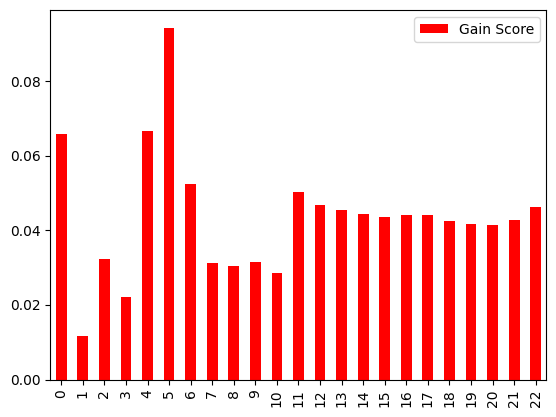

In [133]:
gains.plot(kind = 'bar', color = 'red')

<Axes: >

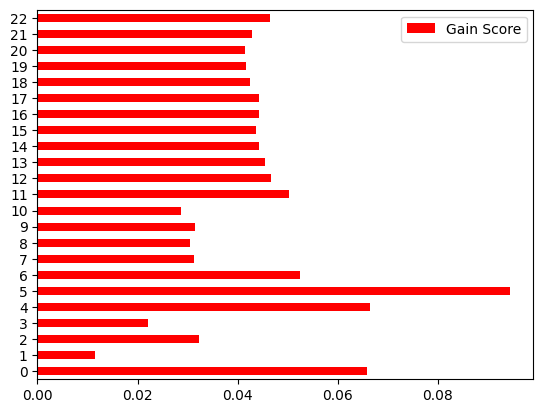

In [134]:
gains.plot(kind = 'barh', color = 'red')

<Figure size 1000x1000 with 0 Axes>

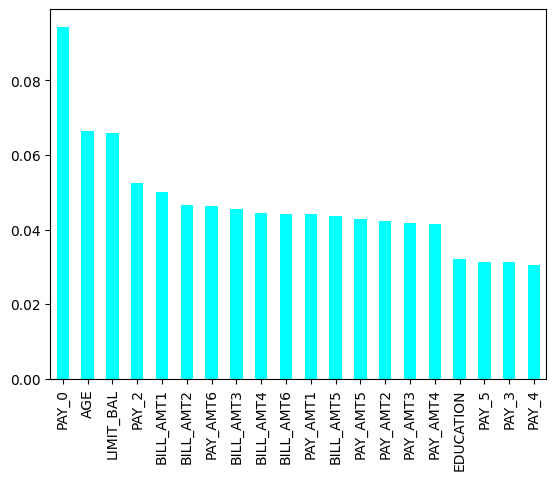

<Figure size 1000x1000 with 0 Axes>

In [135]:
features = pd.Series(feature_importance, index = x.columns)
features.nlargest(20).plot(kind = 'bar', color = 'cyan')
plt.figure(figsize = (10, 10))

# Select K Best

In [136]:
df = pd.read_excel('credit card.xlsx')

In [137]:
df = df.rename(columns={'default.payment.next.month': 'payment'})

In [138]:
x = df.drop(['ID', 'payment'], axis = 1)
y = df['payment']

In [139]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [140]:
from sklearn.feature_selection import SelectKBest, f_classif

In [141]:
model2 = SelectKBest(score_func = f_classif)

In [142]:
feature_score = model2.fit(x, y)

In [143]:
feature_score.scores_

array([7.24068539e+02, 4.79788543e+01, 2.35471118e+01, 1.77812714e+01,
       5.78855582e+00, 3.53771497e+03, 2.23916914e+03, 1.75746644e+03,
       1.47684597e+03, 1.30459118e+03, 1.08540249e+03, 1.15805315e+01,
       6.04423789e+00, 5.94438771e+00, 3.09474518e+00, 1.37108740e+00,
       8.65820292e-01, 1.60403810e+02, 1.03291524e+02, 9.52180109e+01,
       9.71880005e+01, 9.14298008e+01, 8.50890453e+01])

In [144]:
cols = pd.DataFrame(feature_score.scores_, columns = ['Feature Score'])
cols

,Feature Score
0,724.068539
1,47.978854
2,23.547112
3,17.781271
4,5.788556
5,3537.714970
6,2239.169136
7,1757.466444
8,1476.845967
9,1304.591176


In [145]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [146]:
col2 = pd.DataFrame(x.columns, columns = ['Feature Names'])

In [147]:
col2.head()

,Feature Names
0,LIMIT_BAL
1,SEX
2,EDUCATION
3,MARRIAGE
4,AGE


In [148]:
scores = pd.concat([col2, cols], axis = 1)

In [149]:
scores

,Feature Names,Feature Score
0,LIMIT_BAL,724.068539
1,SEX,47.978854
2,EDUCATION,23.547112
3,MARRIAGE,17.781271
4,AGE,5.788556
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176


In [150]:
newx = scores.nlargest(15, 'Feature Score')

In [151]:
newx.head()

,Feature Names,Feature Score
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176


# PCA

In [152]:
df = pd.read_excel('credit card.xlsx')

In [153]:
df = df.rename(columns={'default.payment.next.month': 'payment'})

In [154]:
x = df.drop(['ID', 'payment'], axis = 1)
y = df['payment']

In [155]:
from sklearn.preprocessing import MinMaxScaler

In [156]:
mmx = MinMaxScaler()

In [157]:
scaled_x = mmx.fit_transform(x)

In [158]:
scaled_x.shape

(30000, 23)

In [159]:
scaled_x

array([[0.01010101, 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 1.        , 0.33333333, ..., 0.00161031, 0.        ,
        0.00378311],
       [0.08080808, 1.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00945777],
       ...,
       [0.02020202, 0.        , 0.33333333, ..., 0.00676329, 0.00468901,
        0.00586382],
       [0.07070707, 0.        , 0.5       , ..., 0.00310145, 0.12417444,
        0.00341236],
       [0.04040404, 0.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00189155]])

In [160]:
from sklearn.decomposition import PCA

In [161]:
pca = PCA(n_components = 3)
x_pca = pca.fit_transform(scaled_x)

In [162]:
x_pca

array([[-0.40423245, -0.00800477, -0.00259675],
       [-0.39188881,  0.20922401, -0.19698757],
       [-0.39264215,  0.08409527, -0.12656656],
       ...,
       [ 0.62351265,  0.33728836, -0.08489186],
       [ 0.60374479, -0.01953156,  0.21421095],
       [ 0.60917214,  0.0099741 ,  0.23321989]])